<a href="https://colab.research.google.com/github/Ehizson/HDSC-W2023-ExtraProjects/blob/main/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Charges Prediction**

* **Objective**

This dataset contains detailed information about insurance customers, including their age, sex, body mass index (BMI), number of children, smoking status and region. 
Tasks are
* Using age, sex and bmi to create an algorithm for assessing life insurance costs.
* Predicting costs for certain patients based on their sex, age, bmi and region.

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#load dataset

data = pd.read_csv('/content/insurance.csv')

### **Data Preparation**

In [3]:
data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.drop('index', axis=1, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values detected

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Exploratory Data Analysis**

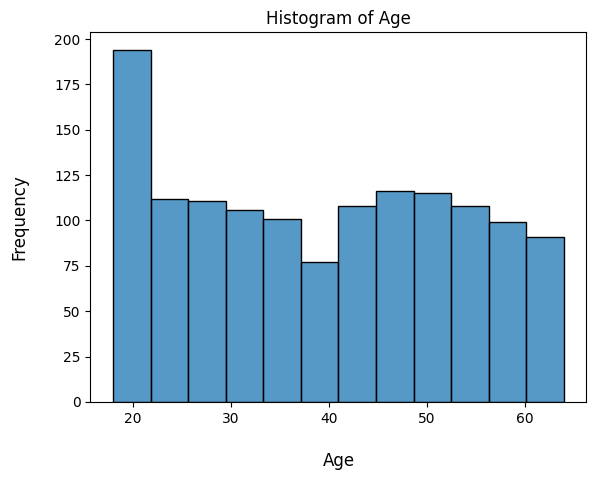

In [8]:
#Distribution of Age

sns.histplot(data['age'])
plt.title('Histogram of Age')
plt.xlabel("\nAge", fontsize=12)
plt.ylabel("Frequency\n", fontsize=12)
plt.show()

* Most of the participant comes from age 20.
* There is a reduction in insurance participants as the age range extends. This might indicate a correlation between age and insurance charges.

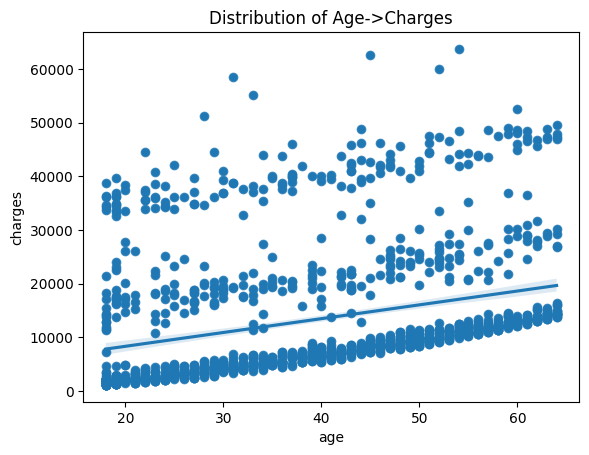

In [9]:
#Distribution of Age->Charges

sns.scatterplot(x=data['age'],y=data['charges'])
sns.regplot(x=data['age'],y=data['charges'])
plt.title('Distribution of Age->Charges')
plt.show()

* The regression line has a positive slope hence it indicates that older people tend to pay more insurance charges than younger people.

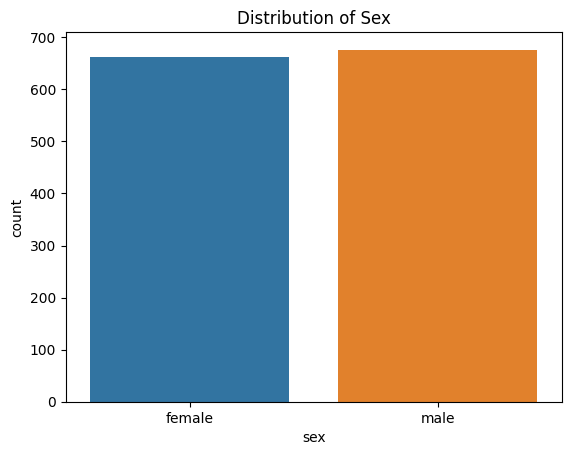

In [10]:
#Distribution of Sex

sns.countplot(x='sex',data=data)
plt.title('Distribution of Sex')
plt.show()

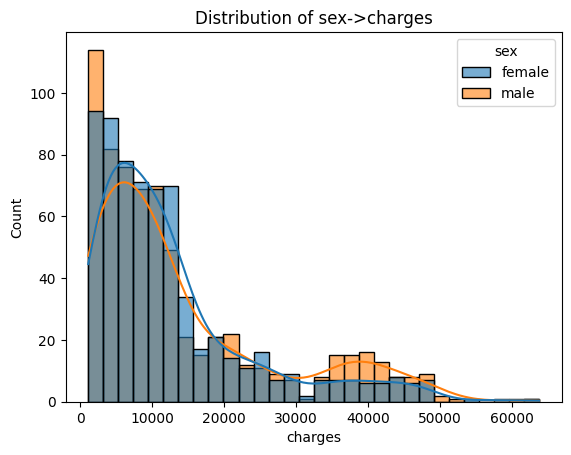

In [11]:
#Distribution of sex->charges

sns.histplot(data,x='charges',hue='sex',kde=True,alpha=0.6,linewidth=1)
plt.title('Distribution of sex->charges')
plt.show()

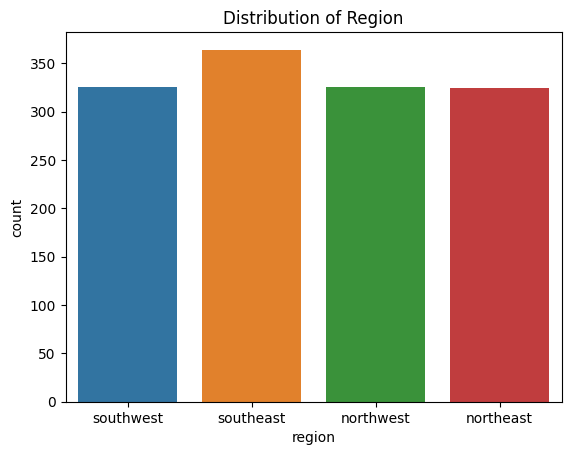

In [12]:
#Distribution of Region

sns.countplot(x='region',data=data)
plt.title('Distribution of Region')
plt.show()

* Most of the people in our dataset come from southeast region

### **Data Transformation**

**Data Encoding**

In our data info, we have 3 object dtypes which are categorical and need to change it to numerical, so as to be used in machine learning models.

* Sex
* Smoker
* Region

In [13]:
#Encoding sex column
data.replace({'sex': {'male':0, 'female':1}}, inplace=True)

#Encoding smoker column
data.replace({'smoker': {'yes':0, 'no':1}}, inplace=True) 

#Encoding region column
data.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


### **ML Model**

In [15]:
y = data['charges']
X = data.drop('charges', axis=1)

In [16]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#check the split data
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (936, 6)
X_test: (402, 6)
y_train: (936,)
y_test: (402,)


**ML Model using Linear Regression**

In [17]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [18]:
#test and score the model against the test data

model1.score(X_test, y_test)

0.7694315077300078

The Linear regression model gives an accuracy score of 0.76 of predicting insurance charges based on the dataset.

In [19]:
#Prediction dataframe
from copy import deepcopy

data1_sub = deepcopy(X_train)
data1_sub['Charges'] = data['charges']

In [20]:
#Linear_model Prediction

data1_sub["lm_pred"] = model1.predict(X_train)
data1_sub.head()

,age,sex,bmi,children,smoker,region,Charges,lm_pred
332,61,1,31.160,0,1,3,13429.03540,14189.094907
355,46,0,27.600,0,1,1,24603.04837,8681.542180
138,54,1,31.900,3,1,0,27322.73386,13189.123149
381,55,0,30.685,0,0,2,42303.69215,35974.743610
292,25,0,45.540,2,0,0,42112.23560,33643.212568


The new column 'lm_pred' was created as I used the model1(accuracy score of 0.76) to predict insurance charges.

**ML Model using RandomForestRegressor**

In [21]:
from sklearn.ensemble import  RandomForestRegressor

model2 = RandomForestRegressor(random_state=1)
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [22]:
#test and score the model against the test data

model2.score(X_test, y_test)

0.8552730573672616

Using the RandomForestRegressor model gives an accuracy score of 0.85 of predicting insurance charges based on the dataset, which is way better than model1

In [23]:
#Random_model Prediction

data1_sub["rm_pred"] = model2.predict(X_train)
data1_sub.head()

,age,sex,bmi,children,smoker,region,Charges,lm_pred,rm_pred
332,61,1,31.160,0,1,3,13429.03540,14189.094907,13531.239012
355,46,0,27.600,0,1,1,24603.04837,8681.542180,18599.153085
138,54,1,31.900,3,1,0,27322.73386,13189.123149,21920.907223
381,55,0,30.685,0,0,2,42303.69215,35974.743610,42567.458100
292,25,0,45.540,2,0,0,42112.23560,33643.212568,41088.718780


The new column 'rm_pred' was created as I used the model2(accuracy score of 0.85) to predict insurance charges.

**Conclusion**

Based on the characteristics of the dataset, I employed the RandomForestRegressor model, which performs better than the Linear Regression model, with a score of 0.85 in terms of accuracy, in predicting insurance charges.